# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

C:\Users\Colt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.60

In [7]:
results = {}

In [10]:
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
#使用迴圈，建立不同 Learning rate 的模型並訓練

#SGD
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with lr = %.6f and using SGD optimizer." % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "SGD-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    


Experiment with lr = 0.100000 and using SGD optimizer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.2043 - acc: 0.2124 - val_loss: 2.1249 - val_acc: 0.2541
Epoch 2/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.0766 - acc: 0.2747 - val_loss: 2.0364 - val_acc: 0.2859
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.0047 - acc: 0.2970 - val_loss: 1.9794 - val_acc: 0.3009
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.9537 - acc: 0.3166 - val_loss: 1.9346 - val_acc: 0.3254
Epoch 5/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.9143 - acc: 0.3307 - val_loss: 1.8973 - val_acc: 0.3353
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.8835 - acc: 0.3426 - val_loss: 1.8714 - val_acc: 0.3520
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.8584 - acc: 0.3513 - val_loss: 1.8468 - val_acc

50000/50000 [==============================] - 3s 61us/step - loss: 2.3251 - acc: 0.0932 - val_loss: 2.3223 - val_acc: 0.0976
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.3189 - acc: 0.0972 - val_loss: 2.3165 - val_acc: 0.1011
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.3135 - acc: 0.1013 - val_loss: 2.3112 - val_acc: 0.1061
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.3085 - acc: 0.1074 - val_loss: 2.3065 - val_acc: 0.1118
Epoch 6/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.3039 - acc: 0.1136 - val_loss: 2.3020 - val_acc: 0.1189
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.2997 - acc: 0.1202 - val_loss: 2.2979 - val_acc: 0.1257
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.2957 - acc: 0.1266 - val_loss: 2.2941 - val_acc: 0.1324
Epoch 9/50
50000/50000 [============================

In [12]:
#RMSprop
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with lr = %.6f and using RMSprop optimizer." % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "RMSprop-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with lr = 0.100000 and using RMSprop optimizer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.2634 - acc: 0.2134 - val_loss: 1.9310 - val_acc: 0.3047
Epoch 2/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.8861 - acc: 0.3204 - val_loss: 1.7603 - val_acc: 0.3618
Epoch 3/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.7805 - acc: 0.3612 - val_loss: 1.8413 - val_acc: 0.3463
Epoch 4/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.7147 - acc: 0.3848 - val_loss: 1.7670 - val_acc: 0.3594
Epoch 5/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6560 - acc: 0.4102 - val_loss: 1.7025 - val_acc: 0.3735
Epoch 6/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6073 - acc: 0.4252 - val_loss: 1.6075 - val_acc: 0.4204
Epoch 7/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.5658 - acc: 0.4433 - val_loss: 1.6611 - val_acc

50000/50000 [==============================] - 3s 64us/step - loss: 1.9512 - acc: 0.3242 - val_loss: 1.9103 - val_acc: 0.3403
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8765 - acc: 0.3481 - val_loss: 1.8590 - val_acc: 0.3500
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8314 - acc: 0.3654 - val_loss: 1.8240 - val_acc: 0.3737
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7981 - acc: 0.3761 - val_loss: 1.7900 - val_acc: 0.3858
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7701 - acc: 0.3858 - val_loss: 1.7702 - val_acc: 0.3826
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7467 - acc: 0.3964 - val_loss: 1.7467 - val_acc: 0.3941
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7258 - acc: 0.4008 - val_loss: 1.7306 - val_acc: 0.3947
Epoch 9/50
50000/50000 [============================

In [13]:
#AdaGrad
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with lr = %.6f and using AdaGrad optimizer." % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "AdaGrad-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with lr = 0.100000 and using AdaGrad optimizer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9955 - acc: 0.2802 - val_loss: 1.9096 - val_acc: 0.3147
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8039 - acc: 0.3655 - val_loss: 1.8191 - val_acc: 0.3321
Epoch 3/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7307 - acc: 0.3917 - val_loss: 1.7642 - val_acc: 0.3777
Epoch 4/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6811 - acc: 0.4120 - val_loss: 1.7056 - val_acc: 0.3916
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6438 - acc: 0.4250 - val_loss: 1.6729 - val_acc: 0.4052
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6144 - acc: 0.4350 - val_loss: 1.6301 - val_acc: 0.4210
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5913 - acc: 0.4432 - val_loss: 1.6570 - val_acc

50000/50000 [==============================] - 3s 62us/step - loss: 2.2203 - acc: 0.1991 - val_loss: 2.2080 - val_acc: 0.2025
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.1952 - acc: 0.2215 - val_loss: 2.1879 - val_acc: 0.2208
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.1773 - acc: 0.2336 - val_loss: 2.1723 - val_acc: 0.2342
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.1629 - acc: 0.2437 - val_loss: 2.1596 - val_acc: 0.2430
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.1509 - acc: 0.2516 - val_loss: 2.1487 - val_acc: 0.2504
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.1407 - acc: 0.2561 - val_loss: 2.1392 - val_acc: 0.2548
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.1317 - acc: 0.2613 - val_loss: 2.1309 - val_acc: 0.2579
Epoch 9/50
50000/50000 [============================

In [14]:
#Adam
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with lr = %.6f and using Adam optimizer." % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers. Adam(lr=lr, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "Adam-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with lr = 0.100000 and using Adam optimizer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.9557 - acc: 0.2899 - val_loss: 1.8213 - val_acc: 0.3376
Epoch 2/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7245 - acc: 0.3839 - val_loss: 1.6533 - val_acc: 0.4122
Epoch 3/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.6267 - acc: 0.4199 - val_loss: 1.5957 - val_acc: 0.4277
Epoch 4/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5546 - acc: 0.4443 - val_loss: 1.5113 - val_acc: 0.4614
Epoch 5/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5075 - acc: 0.4620 - val_loss: 1.5204 - val_acc: 0.4622
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4687 - acc: 0.4795 - val_loss: 1.4690 - val_acc: 0.4773
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4445 - acc: 0.4865 - val_loss: 1.4517 - val_acc

50000/50000 [==============================] - 3s 68us/step - loss: 1.9394 - acc: 0.3212 - val_loss: 1.8937 - val_acc: 0.3354
Epoch 3/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8587 - acc: 0.3478 - val_loss: 1.8335 - val_acc: 0.3604
Epoch 4/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8084 - acc: 0.3670 - val_loss: 1.7909 - val_acc: 0.3769
Epoch 5/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.7722 - acc: 0.3783 - val_loss: 1.7597 - val_acc: 0.3867
Epoch 6/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.7444 - acc: 0.3886 - val_loss: 1.7338 - val_acc: 0.3953
Epoch 7/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.7189 - acc: 0.3967 - val_loss: 1.7158 - val_acc: 0.4044
Epoch 8/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.6986 - acc: 0.4049 - val_loss: 1.6946 - val_acc: 0.4083
Epoch 9/50
50000/50000 [============================

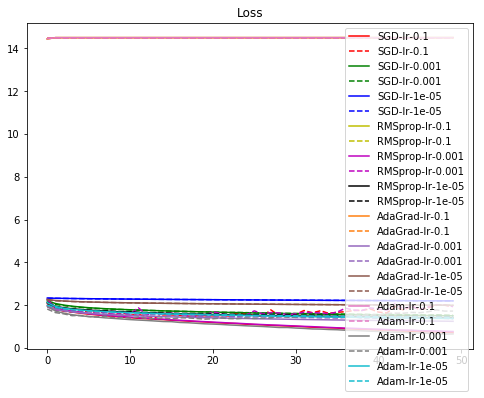

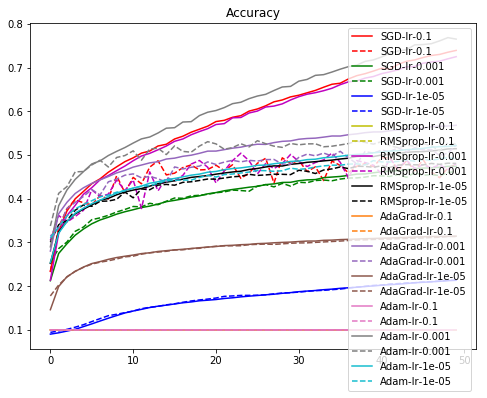

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k",
             "tab:orange","tab:purple","tab:brown","tab:pink","tab:gray","tab:cyan"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()